In [1]:
# Step 1. Import Tensorflow and other helper libraries

# make sure tensorflow is installed; uncomment the line before if you need to
# pip install tensorflow

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models  #this is a new dependency!

From https://www.cs.toronto.edu/~kriz/cifar.html:
"The CIFAR-10 dataset consists of 60000 color images in 10 classes, with 6000 images per class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks."

In [2]:
# Step 2. Load the CIFAR-10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Step 3. Pre-process and Explore the data

# Pre-process the data: convert pixel intensities to double values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Write code to check the data has the correct shape/dimension
# Insert your code below

print(x_train.shape, y_train.shape)
x_test.shape, y_test.shape

(50000, 32, 32, 3) (50000, 1)


((10000, 32, 32, 3), (10000, 1))

In [4]:
# Step 4. Build the tf.keras.Sequential model by stacking layers.

# A. Create an "empty" sequential model and then add layers, one by one
# B. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 5 by 5
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the same as the size of each of the images in the data set
# C. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 1
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model = models.Sequential([])
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3))) # num parameters = 5*5*3*32+32
model.add(layers.MaxPooling2D((2,2), strides=1))

In [5]:
# Once a model is "built", you can call its summary() method to display its contents:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Step 5. Add more layers.

# A. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 3 by 3
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the size of the output shape from the last maxpooling layer
# B. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 2
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model.add(layers.Conv2D(32, (3,3), activation='relu')) # num parameters = 3*3*32*32+32
model.add(layers.MaxPooling2D((2,2), strides=2))

In [7]:
#?layers.MaxPooling2D

In [8]:
# Once a model is "built", you can call its summary() method to display its contents:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Adding one more convolutional layer, one flatten layer and two dense layers

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))# last layer should be the size of the output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 6400)              0

In [10]:
# For each example the model returns a vector of "logits" or "log-odds" scores, one for each class.
# pass 1 training data image to the model and convert the predictions into a numpy array
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.05040951,  0.1931329 ,  0.08588631, -0.11306959, -0.14829777,
        -0.3237799 , -0.01577819, -0.21254715,  0.02919005, -0.04679445]],
      dtype=float32)

In [11]:
# Use the tf.nn.softmax function to convert these logits into "probabilities" for each class:
tf.nn.softmax(predictions).numpy()


array([[0.10943971, 0.12622893, 0.11339198, 0.09293448, 0.08971757,
        0.07527773, 0.10243066, 0.08413454, 0.10714193, 0.09930241]],
      dtype=float32)

In [12]:
# Choose an optimizer and loss function for training

# Deep learning neural networks are trained using the stochastic gradient descent optimization 
# algorithm. As part of the optimization algorithm, the error for the current state of the 
# model must be estimated repeatedly. This requires the choice of an error function, 
# conventionally called a loss function, that can be used to estimate the loss of the model so 
# that the weights can be updated to reduce the loss on the next evaluation.

# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and 
# returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This loss is equal to the negative log probability of the true class: It is zero if the model 
# is sure of the correct class. This untrained model gives probabilities close to random
# (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

loss_fn(y_train[:1], predictions).numpy()

2.2785692

In [13]:
# Step 6: Ready to compile! 
# optimizer parameter = 'adam'. Other optimizer options here: 
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# loss = the name of the loss function
# Typically you will use metrics=['accuracy']
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# Task: call the model.fit method to train the model for 10 iterations

# Insert your code below:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5475 - accuracy: 0.4402
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2671 - accuracy: 0.5514
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1311 - accuracy: 0.5992
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0269 - accuracy: 0.6397
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9519 - accuracy: 0.6661
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8922 - accuracy: 0.6858
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8420 - accuracy: 0.7030
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7985 - accuracy: 0.7192
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7633 - accuracy: 0.7307
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.72

In [14]:
# Step 7a. Evaluate the model: compare how the model performs on the test dataset

# The Model.evaluate method checks the models performance, usually on a "Validation-set" 
# or "Test-set".

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.2110 - accuracy: 0.6096 - 816ms/epoch - 3ms/step

Test accuracy: 0.6096000075340271


313/313 - 1s - loss: 1.2110 - accuracy: 0.6096 - 807ms/epoch - 3ms/step


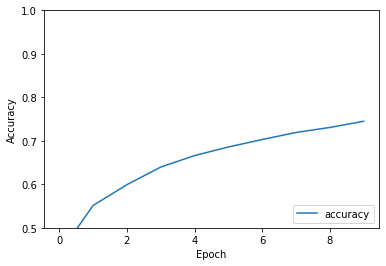

In [18]:
# 7b. Plot training vs testing accuracy

#history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [19]:
# 8. Make predictions

# If you want your model to return a probability, you can wrap the trained model, and attach 
# the softmax classifier to it:

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10])# test the first 10 images
#print(predictions.shape)
predictions[0]


array([3.3658978e-02, 7.6984684e-04, 2.1430358e-02, 2.3735161e-01,
       1.1035348e-03, 2.9782274e-01, 2.6225952e-02, 1.9606939e-04,
       3.7510362e-01, 6.3372999e-03], dtype=float32)

In [20]:
# Apply a label and compare with the test label

print(np.argmax(predictions, axis = 1))
print(y_test[:10])


[8 8 8 0 6 6 3 4 5 9]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


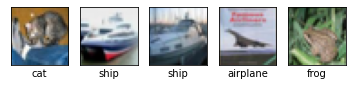

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# View the first five images, to check the validity of the labels
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i][0]])
plt.show() 

In [17]:
history.history

{'loss': [1.5474951267242432,
  1.2671302556991577,
  1.13108491897583,
  1.0269365310668945,
  0.9518603682518005,
  0.8921878337860107,
  0.8420451283454895,
  0.7985242009162903,
  0.7633422613143921,
  0.7251287698745728],
 'accuracy': [0.4401800036430359,
  0.5514400005340576,
  0.5992000102996826,
  0.6396600008010864,
  0.6661199927330017,
  0.6857799887657166,
  0.7030199766159058,
  0.7192000150680542,
  0.7307400107383728,
  0.7450000047683716]}